In [189]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [190]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [191]:
df = pd.read_csv("happiness.csv")
df = df.fillna(0)

In [192]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.
Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică. 
După instalare trebuie să facem restart la runtime.

In [193]:
from pandas_profiling import ProfileReport

In [194]:
#prof=ProfileReport(df)

In [195]:
#Statisticile pot fi salvate În format html
#prof.to_file(output_file='happiness.html')

In [196]:
#prof

In [197]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
#prof=ProfileReport(df,minimal=True)

In [198]:
#prof.to_file(output_file='happiness-min.html')

In [199]:
#prof

In [200]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
X = df.drop(["Country (region)", "Ladder", "SD of Ladder"], axis=1)
#obținem etichetele pentru date salvand ultima coloana
y = df['Ladder']

In [201]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [202]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [203]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(9792, 124)

In [204]:
sum(y_test), len(y_test)

(2454, 32)

In [205]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler

In [206]:
X_train

,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
26,8.0,85.0,78.0,25.0,82.0,78.0,99.0,85.0
110,68.0,60.0,106.0,121.0,88.0,130.0,126.0,109.0
136,146.0,124.0,118.0,129.0,89.0,132.0,85.0,101.0
31,69.0,105.0,43.0,84.0,71.0,108.0,70.0,72.0
11,4.0,87.0,42.0,16.0,58.0,75.0,67.0,28.0
...,...,...,...,...,...,...,...,...
115,126.0,145.0,117.0,123.0,93.0,129.0,91.0,64.0
96,117.0,13.0,18.0,115.0,147.0,112.0,56.0,65.0
91,9.0,104.0,94.0,48.0,129.0,2.0,83.0,98.0
30,7.0,48.0,41.0,32.0,104.0,88.0,51.0,33.0


In [207]:
y_train

26      27
110    111
136    137
31      32
11      12
      ... 
115    116
96      97
91      92
30      31
82      83
Name: Ladder, Length: 124, dtype: int64

In [208]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min


sc = MinMaxScaler((-1, 1))

In [209]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [210]:
X_test

array([[-0.81818182, -0.32467532, -0.62580645, -0.34193548,  0.90540541,
        -0.47096774, -0.5       ,  0.24      ],
       [ 0.01298701, -0.35064935,  0.69032258,  0.00645161, -0.54054054,
        -0.36774194,  0.64473684,  0.57333333],
       [-0.98701299, -0.49350649, -0.61290323, -0.56129032,  0.02702703,
        -0.13548387,  0.18421053,  0.08      ],
       [ 0.27272727,  0.63636364,  0.96129032,  0.74193548, -0.68918919,
         0.92258065,  0.98684211,  0.8       ],
       [-0.66233766, -0.25974026,  0.32903226,  0.45806452, -0.44594595,
         0.87096774,  0.26315789, -1.        ],
       [ 0.94805195, -0.20779221,  0.1483871 ,  0.75483871,  0.7972973 ,
        -0.18709677, -0.03947368, -0.12      ],
       [ 0.45454545,  0.55844156,  0.13548387,  0.13548387, -1.        ,
         0.52258065,  0.21052632, -0.16      ],
       [ 0.32467532,  0.22077922,  0.31612903,  0.93548387,  0.66216216,
         0.96129032, -0.39473684, -0.72      ],
       [-0.76623377, -0.36363636

In [211]:
import torch
from torch import nn, optim

In [212]:
X_train.shape

(124, 8)

In [213]:
y_train.shape

(124,)

In [214]:
X_test.shape

(32, 8)

In [215]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).float()
y_test = torch.tensor(y_test.values).float()

In [220]:
y_train = y_train.reshape(124, 1)
y_train.shape

torch.Size([124, 1])

In [222]:
y_test = y_test.reshape(32, 1)
y_test.shape

torch.Size([32, 1])

In [223]:
class HappinessNN(nn.Module):
    def __init__(self):
        super(HappinessNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output. 
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(8,100),
            nn.Sigmoid(),
            nn.Linear(100, 60),
            nn.Sigmoid(),
            nn.Linear(60, 1)
        )


    def forward(self, x):
        return self.sequential(x)

In [224]:
net = HappinessNN()

In [225]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [226]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
losses = []

In [227]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [228]:
from sklearn.metrics import accuracy_score

In [250]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()

    #Obținem predictii
    outputs = net(X_train)
    # Compute and print loss
    loss = criterion(outputs, y_train)
    
    losses.append(loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Train Epoch: {epoch} Loss:{loss.item()}")

In [251]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [254]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    test_loss=0
    correct = 0

    with torch.no_grad():

        output=net(X_test)
        
        test_loss= criterion(output, y_test)
        test_losses.append(test_loss.item())

        #Obținem predictiile pentru fiecare linie din setul de validare.
        #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare 
        pred = output

        #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
        #correct += pred.eq(y_test.data.view_as(pred)).sum()
        #O altă functie din sklearn ne poate ajuta să abstractizăm operatia de mai sus.
        #print(pred.shape)
        #print(y_test.shape)
        #print(pred)
        #print(y_test)
        #accuracy = accuracy_score(y_test[:, 0], pred[:, 0])
        
        print("============")
        print(f"[Validation set] Average loss: {test_loss}, Accuracy: nu exista la regresii%")
        print("============")

        #ccuracies.append(accuracy)


In [257]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(1000):
  train(epoch)
  validation()

Train Epoch: 0 Loss:211.1588134765625
[Validation set] Average loss: 627.1766967773438, Accuracy: nu exista la regresii%
Train Epoch: 1 Loss:210.84774780273438
[Validation set] Average loss: 644.7625732421875, Accuracy: nu exista la regresii%
Train Epoch: 2 Loss:210.7075653076172
[Validation set] Average loss: 627.9705810546875, Accuracy: nu exista la regresii%
Train Epoch: 3 Loss:210.3965301513672
[Validation set] Average loss: 645.3463745117188, Accuracy: nu exista la regresii%
Train Epoch: 4 Loss:210.2554473876953
[Validation set] Average loss: 628.7661743164062, Accuracy: nu exista la regresii%
Train Epoch: 5 Loss:209.9446258544922
[Validation set] Average loss: 645.933349609375, Accuracy: nu exista la regresii%
Train Epoch: 6 Loss:209.80276489257812
[Validation set] Average loss: 629.5635375976562, Accuracy: nu exista la regresii%
Train Epoch: 7 Loss:209.4923858642578
[Validation set] Average loss: 646.5231323242188, Accuracy: nu exista la regresii%
Train Epoch: 8 Loss:209.3497161

Train Epoch: 95 Loss:190.53248596191406
[Validation set] Average loss: 673.9905395507812, Accuracy: nu exista la regresii%
Train Epoch: 96 Loss:190.4054412841797
[Validation set] Average loss: 664.0800170898438, Accuracy: nu exista la regresii%
Train Epoch: 97 Loss:190.17007446289062
[Validation set] Average loss: 674.6183471679688, Accuracy: nu exista la regresii%
Train Epoch: 98 Loss:190.0467071533203
[Validation set] Average loss: 664.7486572265625, Accuracy: nu exista la regresii%
Train Epoch: 99 Loss:189.8146514892578
[Validation set] Average loss: 675.2460327148438, Accuracy: nu exista la regresii%
Train Epoch: 100 Loss:189.69522094726562
[Validation set] Average loss: 665.4119873046875, Accuracy: nu exista la regresii%
Train Epoch: 101 Loss:189.46630859375
[Validation set] Average loss: 675.8731689453125, Accuracy: nu exista la regresii%
Train Epoch: 102 Loss:189.35073852539062
[Validation set] Average loss: 666.0702514648438, Accuracy: nu exista la regresii%
Train Epoch: 103 Lo

Train Epoch: 167 Loss:178.56224060058594
[Validation set] Average loss: 694.2019653320312, Accuracy: nu exista la regresii%
Train Epoch: 168 Loss:178.5287628173828
[Validation set] Average loss: 685.4508056640625, Accuracy: nu exista la regresii%
Train Epoch: 169 Loss:178.27191162109375
[Validation set] Average loss: 694.7282104492188, Accuracy: nu exista la regresii%
Train Epoch: 170 Loss:178.2436065673828
[Validation set] Average loss: 685.9901733398438, Accuracy: nu exista la regresii%
Train Epoch: 171 Loss:177.98646545410156
[Validation set] Average loss: 695.2543334960938, Accuracy: nu exista la regresii%
Train Epoch: 172 Loss:177.9633331298828
[Validation set] Average loss: 686.5264282226562, Accuracy: nu exista la regresii%
Train Epoch: 173 Loss:177.70547485351562
[Validation set] Average loss: 695.7794189453125, Accuracy: nu exista la regresii%
Train Epoch: 174 Loss:177.68759155273438
[Validation set] Average loss: 687.0595703125, Accuracy: nu exista la regresii%
Train Epoch: 1

[Validation set] Average loss: 713.0779418945312, Accuracy: nu exista la regresii%
Train Epoch: 262 Loss:163.87281799316406
[Validation set] Average loss: 707.9144287109375, Accuracy: nu exista la regresii%
Train Epoch: 263 Loss:163.52015686035156
[Validation set] Average loss: 713.3314819335938, Accuracy: nu exista la regresii%
Train Epoch: 264 Loss:163.5808868408203
[Validation set] Average loss: 708.339599609375, Accuracy: nu exista la regresii%
Train Epoch: 265 Loss:163.2277374267578
[Validation set] Average loss: 713.569091796875, Accuracy: nu exista la regresii%
Train Epoch: 266 Loss:163.2905731201172
[Validation set] Average loss: 708.755126953125, Accuracy: nu exista la regresii%
Train Epoch: 267 Loss:162.93695068359375
[Validation set] Average loss: 713.7899169921875, Accuracy: nu exista la regresii%
Train Epoch: 268 Loss:163.00189208984375
[Validation set] Average loss: 709.1596069335938, Accuracy: nu exista la regresii%
Train Epoch: 269 Loss:162.64779663085938
[Validation se

[Validation set] Average loss: 721.0690307617188, Accuracy: nu exista la regresii%
Train Epoch: 360 Loss:145.35305786132812
[Validation set] Average loss: 728.456787109375, Accuracy: nu exista la regresii%
Train Epoch: 361 Loss:145.07090759277344
[Validation set] Average loss: 721.2850341796875, Accuracy: nu exista la regresii%
Train Epoch: 362 Loss:144.97015380859375
[Validation set] Average loss: 728.9684448242188, Accuracy: nu exista la regresii%
Train Epoch: 363 Loss:144.6911163330078
[Validation set] Average loss: 721.4993286132812, Accuracy: nu exista la regresii%
Train Epoch: 364 Loss:144.58465576171875
[Validation set] Average loss: 729.47998046875, Accuracy: nu exista la regresii%
Train Epoch: 365 Loss:144.3084259033203
[Validation set] Average loss: 721.7128295898438, Accuracy: nu exista la regresii%
Train Epoch: 366 Loss:144.19607543945312
[Validation set] Average loss: 729.9920043945312, Accuracy: nu exista la regresii%
Train Epoch: 367 Loss:143.92227172851562
[Validation s

[Validation set] Average loss: 736.8712768554688, Accuracy: nu exista la regresii%
Train Epoch: 446 Loss:127.8963394165039
[Validation set] Average loss: 756.3206176757812, Accuracy: nu exista la regresii%
Train Epoch: 447 Loss:127.7787857055664
[Validation set] Average loss: 737.4012451171875, Accuracy: nu exista la regresii%
Train Epoch: 448 Loss:127.51939392089844
[Validation set] Average loss: 757.1106567382812, Accuracy: nu exista la regresii%
Train Epoch: 449 Loss:127.40507507324219
[Validation set] Average loss: 737.9345092773438, Accuracy: nu exista la regresii%
Train Epoch: 450 Loss:127.14295196533203
[Validation set] Average loss: 757.9031982421875, Accuracy: nu exista la regresii%
Train Epoch: 451 Loss:127.0319595336914
[Validation set] Average loss: 738.470703125, Accuracy: nu exista la regresii%
Train Epoch: 452 Loss:126.76721954345703
[Validation set] Average loss: 758.6983642578125, Accuracy: nu exista la regresii%
Train Epoch: 453 Loss:126.65953063964844
[Validation set

Train Epoch: 526 Loss:113.84542846679688
[Validation set] Average loss: 789.3504028320312, Accuracy: nu exista la regresii%
Train Epoch: 527 Loss:113.85623168945312
[Validation set] Average loss: 759.8060913085938, Accuracy: nu exista la regresii%
Train Epoch: 528 Loss:113.51197814941406
[Validation set] Average loss: 790.21435546875, Accuracy: nu exista la regresii%
Train Epoch: 529 Loss:113.5256118774414
[Validation set] Average loss: 760.4033203125, Accuracy: nu exista la regresii%
Train Epoch: 530 Loss:113.18019104003906
[Validation set] Average loss: 791.0814208984375, Accuracy: nu exista la regresii%
Train Epoch: 531 Loss:113.19685363769531
[Validation set] Average loss: 761.0030517578125, Accuracy: nu exista la regresii%
Train Epoch: 532 Loss:112.85031127929688
[Validation set] Average loss: 791.9515380859375, Accuracy: nu exista la regresii%
Train Epoch: 533 Loss:112.87001037597656
[Validation set] Average loss: 761.6047973632812, Accuracy: nu exista la regresii%
Train Epoch: 5

Train Epoch: 598 Loss:102.853271484375
[Validation set] Average loss: 822.4967041015625, Accuracy: nu exista la regresii%
Train Epoch: 599 Loss:102.96821594238281
[Validation set] Average loss: 782.96533203125, Accuracy: nu exista la regresii%
Train Epoch: 600 Loss:102.57947540283203
[Validation set] Average loss: 823.4697265625, Accuracy: nu exista la regresii%
Train Epoch: 601 Loss:102.69812774658203
[Validation set] Average loss: 783.6458129882812, Accuracy: nu exista la regresii%
Train Epoch: 602 Loss:102.30741882324219
[Validation set] Average loss: 824.4421997070312, Accuracy: nu exista la regresii%
Train Epoch: 603 Loss:102.42969512939453
[Validation set] Average loss: 784.3253784179688, Accuracy: nu exista la regresii%
Train Epoch: 604 Loss:102.03669738769531
[Validation set] Average loss: 825.413330078125, Accuracy: nu exista la regresii%
Train Epoch: 605 Loss:102.16252899169922
[Validation set] Average loss: 785.0035400390625, Accuracy: nu exista la regresii%
Train Epoch: 606

Train Epoch: 675 Loss:91.54197692871094
[Validation set] Average loss: 808.7109375, Accuracy: nu exista la regresii%
Train Epoch: 676 Loss:91.02455139160156
[Validation set] Average loss: 856.444580078125, Accuracy: nu exista la regresii%
Train Epoch: 677 Loss:91.21165466308594
[Validation set] Average loss: 809.4050903320312, Accuracy: nu exista la regresii%
Train Epoch: 678 Loss:90.6936264038086
[Validation set] Average loss: 857.2125244140625, Accuracy: nu exista la regresii%
Train Epoch: 679 Loss:90.8821029663086
[Validation set] Average loss: 810.0999145507812, Accuracy: nu exista la regresii%
Train Epoch: 680 Loss:90.36365509033203
[Validation set] Average loss: 857.9779663085938, Accuracy: nu exista la regresii%
Train Epoch: 681 Loss:90.553466796875
[Validation set] Average loss: 810.7954711914062, Accuracy: nu exista la regresii%
Train Epoch: 682 Loss:90.03462982177734
[Validation set] Average loss: 858.7408447265625, Accuracy: nu exista la regresii%
Train Epoch: 683 Loss:90.22

[Validation set] Average loss: 854.6405029296875, Accuracy: nu exista la regresii%
Train Epoch: 824 Loss:68.06700897216797
[Validation set] Average loss: 901.5716552734375, Accuracy: nu exista la regresii%
Train Epoch: 825 Loss:68.26656341552734
[Validation set] Average loss: 855.1332397460938, Accuracy: nu exista la regresii%
Train Epoch: 826 Loss:67.79669189453125
[Validation set] Average loss: 902.03857421875, Accuracy: nu exista la regresii%
Train Epoch: 827 Loss:67.995849609375
[Validation set] Average loss: 855.6226196289062, Accuracy: nu exista la regresii%
Train Epoch: 828 Loss:67.52850341796875
[Validation set] Average loss: 902.50390625, Accuracy: nu exista la regresii%
Train Epoch: 829 Loss:67.72724151611328
[Validation set] Average loss: 856.1085815429688, Accuracy: nu exista la regresii%
Train Epoch: 830 Loss:67.26238250732422
[Validation set] Average loss: 902.967529296875, Accuracy: nu exista la regresii%
Train Epoch: 831 Loss:67.46075439453125
[Validation set] Average l

Train Epoch: 920 Loss:57.17987823486328
[Validation set] Average loss: 921.9093017578125, Accuracy: nu exista la regresii%
Train Epoch: 921 Loss:57.366817474365234
[Validation set] Average loss: 874.832763671875, Accuracy: nu exista la regresii%
Train Epoch: 922 Loss:56.98832321166992
[Validation set] Average loss: 922.2670288085938, Accuracy: nu exista la regresii%
Train Epoch: 923 Loss:57.17494583129883
[Validation set] Average loss: 875.154052734375, Accuracy: nu exista la regresii%
Train Epoch: 924 Loss:56.79764938354492
[Validation set] Average loss: 922.6204833984375, Accuracy: nu exista la regresii%
Train Epoch: 925 Loss:56.983943939208984
[Validation set] Average loss: 875.4707641601562, Accuracy: nu exista la regresii%
Train Epoch: 926 Loss:56.60782241821289
[Validation set] Average loss: 922.9693603515625, Accuracy: nu exista la regresii%
Train Epoch: 927 Loss:56.79378128051758
[Validation set] Average loss: 875.7832641601562, Accuracy: nu exista la regresii%
Train Epoch: 928

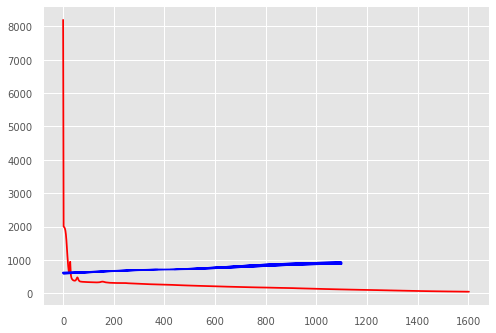

In [266]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(losses, "r-", test_losses, "b-")

In [264]:
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    preds_y = net(X_test[index_from_the_validation_set])
    print(preds_y)
    print(y_test[index_from_the_validation_set])

In [265]:
try_a_single_example_with_the_network(6)

tensor([106.8545])
tensor([101.])
